<a href="https://colab.research.google.com/github/lakshit2808/Machine-Learning-Notes/blob/master/Data_Visualization/Seaborn/seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEABORN
<hr>
Basics

In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- `%matplotlib inline` this line will make sure that plot will show up after cell execution.

- `sns.set(style="darkgrid")` here we are setting the style for the plot, you may change the style instead of darkgrid by pressing SHIFT + TAB while putting cursor just after the `style=`

In [ ]:
sns.set(style="darkgrid")

- `sns.load_dataset('tips')` Here we are loading the sample dataset which are provided by seaborn by default. 

In [ ]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Scatter Plot

- `sns.relplot(x = 'total_bill', y = 'tip', data = df, hue='size', style='time', size='size', sizes=(65,200))`
  - Here first we set the `x` and `y` axis then we set the source of the data in `data` parameter, then we use `hue` : it seprated the data based on the colour, after that we set style as time because it'll change the shape of the point where time is different, then we used `size = 'size'`  because as the value in size column increase the size of the point increase, at last we used sizes to increase the size range of point from radius of 65 to 200 

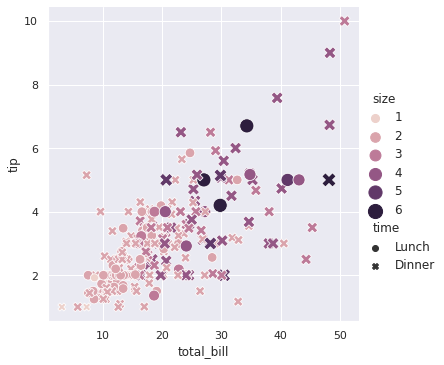

In [ ]:
sns.relplot(x = 'total_bill', y = 'tip', data = df, hue='size', style='time', size='size', sizes=(65,200))

## Line Plot

In [ ]:
## Let's create a new dataframe
df = np.random.rand(100,2)
df = pd.DataFrame(df, columns = ['A', 'B'])
df

,A,B
0,0.631699,0.470511
1,0.008643,0.270996
2,0.564457,0.870276
3,0.039101,0.217497
4,0.496792,0.884264
...,...,...
95,0.943253,0.128452
96,0.942797,0.284848
97,0.193556,0.034138
98,0.899496,0.608203


- `sns.relplot(x = 'A' , y = 'B', data = df, kind='line', sort=True)`
  - Nothing new but still we set the kind of graph to be a line and in the first graph we have sorted the data but in the second one we haven't sorted it.

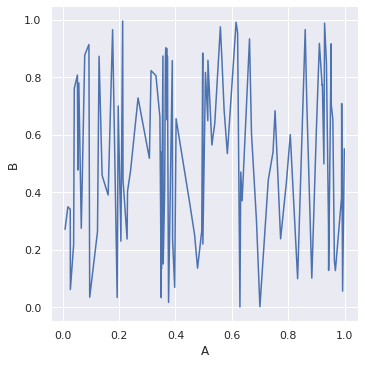

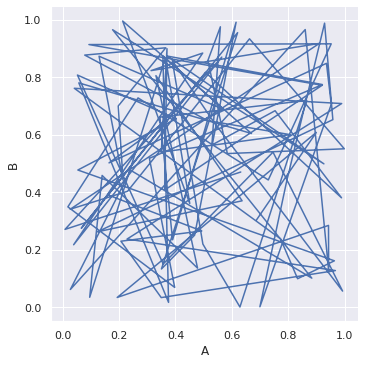

In [ ]:
sns.relplot(x = 'A' , y = 'B', data = df, kind='line', sort=True)

sns.relplot(x = 'A' , y = 'B', data = df, kind='line', sort=False)

- More on Line Plot

In [ ]:
## Load Dataset
df = sns.load_dataset('fmri')
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


- The border type in graph one is confidence intervel it's some what like a standard deviation.
- `ci = False` means no CI border
- `ci = 'sd'` means setting a standard deviation.

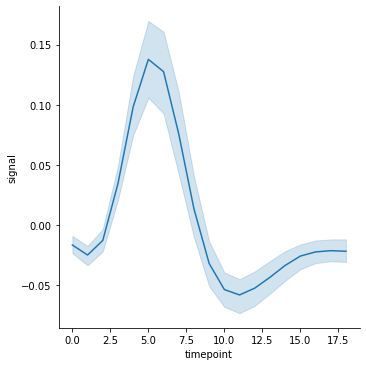

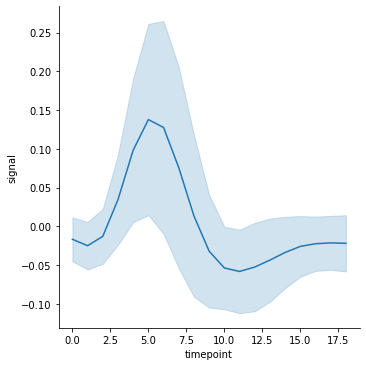

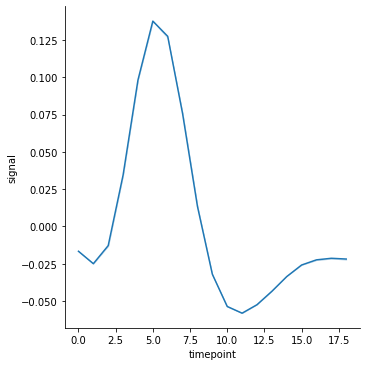

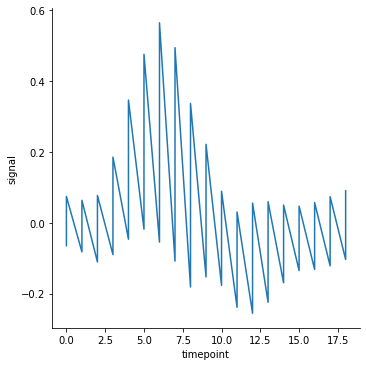

In [ ]:
sns.relplot(x = 'timepoint' , y = 'signal', kind = 'line', data = df)
sns.relplot(x = 'timepoint' , y = 'signal', kind = 'line', data = df, ci = 'sd')
sns.relplot(x = 'timepoint' , y = 'signal', kind = 'line', data = df, ci = False) ## But it still have confidence
sns.relplot(x = 'timepoint', y = 'signal', data = df, kind = 'line', estimator = None) ## Now it's the exact graph for exact data

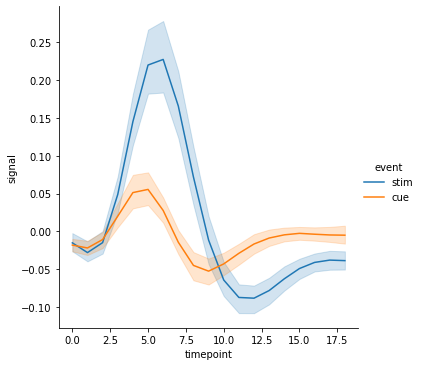

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', data = df, kind = 'line' ,hue = 'event')

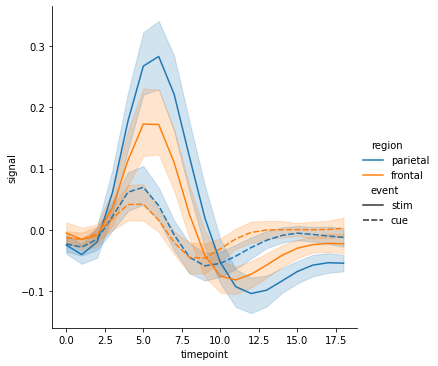

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', data = df, kind = 'line' ,style = 'event', hue = 'region')

- `markers = True` to add points on the graph

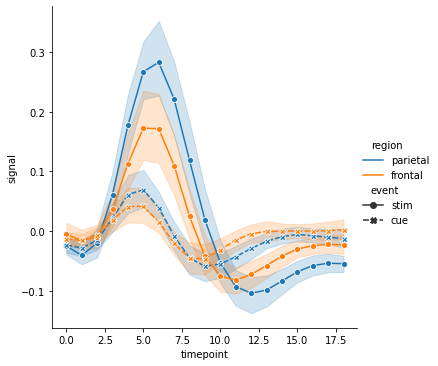

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', data = df, kind = 'line' ,style = 'event', hue = 'region', markers= True)

- `dashes = False` to remove dash from the line

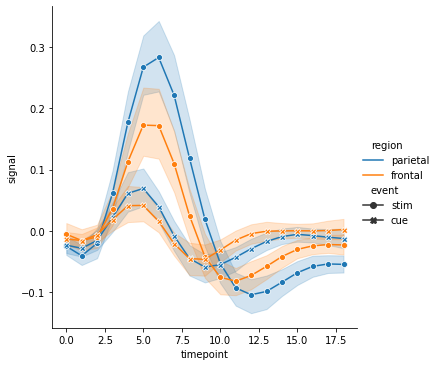

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', data = df, kind = 'line' ,style = 'event', hue = 'region', markers= True, dashes=False)

- `data = df.query("event == 'stim'")` Here what I mean is we are only plotting the data where event is stim
- `units = 'subject'` is used to make lines based on the value_counts of subject

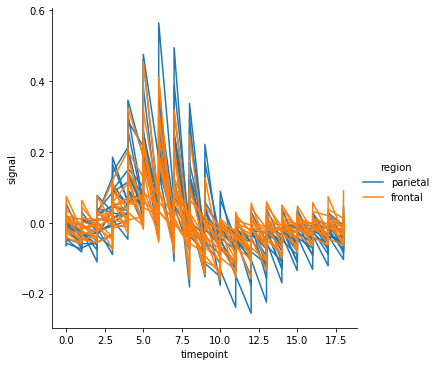

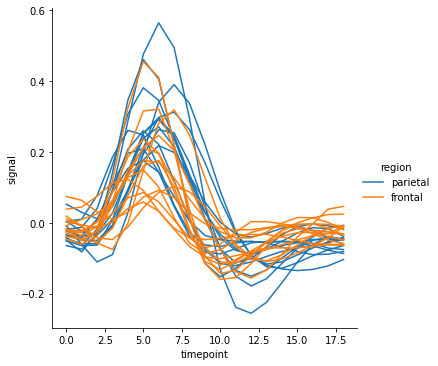

In [37]:
sns.relplot(x = 'timepoint', y = 'signal', data = df, kind = 'line', estimator = None, hue = 'region', units='subject')
sns.relplot(x = 'timepoint', y = 'signal', data = df.query("event == 'stim'"), kind = 'line', estimator = None, hue = 'region', units='subject')

In [39]:
## Load new Dataset
df = sns.load_dataset('dots').query("align == 'dots'")
df.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


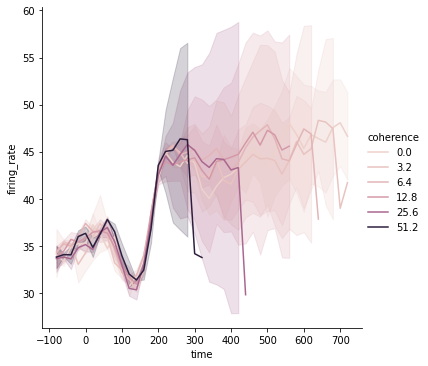

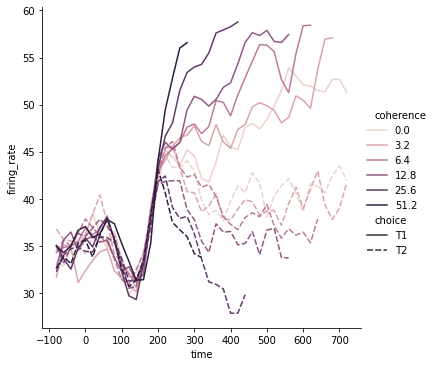

In [44]:
sns.relplot(x = 'time', y = 'firing_rate', data = df, kind= 'line', hue = 'coherence')

## Palette is used to change the colour 
palette = sns.cubehelix_palette(light = 0.85, n_colors=6)
sns.relplot(x = 'time', y = 'firing_rate', data = df, kind= 'line', hue = 'coherence', style= 'choice', palette= palette)

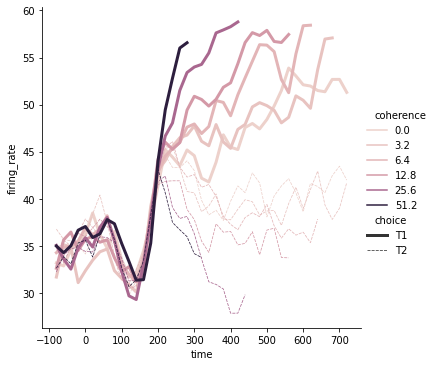

In [47]:
sns.relplot(x ='time', y = 'firing_rate', data = df, kind = 'line', hue = 'coherence', size = 'choice', style = 'choice')